### Time Series Forecasting  on Automobile Sales According todifferent  Segments ARIMA and Holt's Winter 

### 1.0 Preparation

#### 1.1 Getting Data


In [50]:
import pandas as pd
import numpy as np

df_2004 = pd.read_excel("MODELDOKUMUARALIK2004.xls",skiprows=1,index_col=None)
df_2005 = pd.read_excel("MODELDOKUMUARALIK2005.xls",skiprows=1,index_col=None)
df_2006 = pd.read_excel("Model Dökümü, Aralık 2006.xls",skiprows=1,index_col=None)
df_2007 = pd.read_excel("MODELDOKUMARALIK2007.xls",skiprows=1,index_col=None)
df_2008 = pd.read_excel("MODELDOKUMUARALIK2008.xls",skiprows=1,index_col=None)
df_2009 = pd.read_excel("MODELDOKUMUARALIK2009.xls",skiprows=1,index_col=None)
df_2010 = pd.read_excel("MODELDOKUMUARALIK2010.xls",skiprows=1,index_col=None)
df_2011 = pd.read_excel("MODELDOKUMUARALIK2011.xls",skiprows=1,index_col=None)
df_2012 = pd.read_excel("MODELDOKUMARALIK2012.xls",skiprows=1,index_col=None)
df_2013 = pd.read_excel("MODELDOKUMUARALIK2013.xls",skiprows=1,index_col=None)
df_2014 = pd.read_excel("MODELDOKUMUARALIK2014.xls",skiprows=1,index_col=None)
df_2015 = pd.read_excel("MODELDOKUMARALIK2015.xls",skiprows=2,index_col=None)
df_2016 = pd.read_excel("Model Dokumu Aralık'2016.xls",skiprows=2,index_col=None)
df_2017 = pd.read_excel("Model Dokumu Aralık 2017.xlsx",skiprows=2,index_col=None)
df_2018 = pd.read_excel("Model Dokumu Şubat'2018.xls",skiprows=2,index_col=None)



#### 1.2 Dividing into the segments and clean unnecessary data & Merge Operation


In [51]:
def segment(df):
    df = df.iloc[:-25,3:16]
    df["SEGMENT"] = df["SEGMENT"].astype('str')
    df = df[df.SEGMENT.str.contains("nan") == False]
    df["SEGMENT"] = df["SEGMENT"].apply(lambda x: str(x)[0])
    df = df.groupby(["SEGMENT"]).sum()
    return df
df_2004 = segment(df_2004)
df_2005 = segment(df_2005)
df_2006 = segment(df_2006)
df_2007 = segment(df_2007)
df_2008 = segment(df_2008)
df_2009 = segment(df_2009)
df_2010 = segment(df_2010)
df_2011 = segment(df_2011)
df_2012 = segment(df_2012)
df_2013 = segment(df_2013)
df_2014 = segment(df_2014)
df_2015 = segment(df_2015)
df_2016 = segment(df_2016)
df_2017 = segment(df_2017)
df_2018 = segment(df_2018)

df_2018 = df_2018.iloc[:,0:2]


df_2004 = df_2004.transpose()
df_2005 = df_2005.transpose()
df_2006 = df_2006.transpose()
df_2007 = df_2007.transpose()
df_2008 = df_2008.transpose()
df_2009 = df_2009.transpose()
df_2010 = df_2010.transpose()
df_2011 = df_2011.transpose()
df_2012 = df_2012.transpose()
df_2013 = df_2013.transpose()
df_2014 = df_2014.transpose()
df_2015 = df_2015.transpose()
df_2016 = df_2016.transpose()
df_2017 = df_2017.transpose()
df_2018 = df_2018.transpose()




data = pd.concat([df_2004,df_2005,df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018])
del df_2004,df_2005,df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 200401 to 201802
Data columns (total 6 columns):
A    170 non-null int64
B    170 non-null int64
C    170 non-null int64
D    170 non-null int64
E    170 non-null int64
F    170 non-null int64
dtypes: int64(6)
memory usage: 9.3 KB


SEGMENT,A,B,C,D,E,F
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,252.205882,16107.947059,20767.447059,5412.111765,1146.947059,287.935294
std,137.381941,6286.426447,11060.365468,2657.924205,768.974128,144.008429
min,41.000000,4049.000000,4482.000000,1653.000000,222.000000,98.000000
25%,152.000000,12124.250000,12745.750000,3462.250000,552.750000,185.750000
50%,229.000000,15880.000000,18736.000000,4940.000000,944.500000,261.500000
75%,326.000000,19468.250000,25811.250000,6702.000000,1600.000000,342.000000
max,948.000000,37670.000000,59812.000000,15515.000000,4025.000000,904.000000


#### 1.3 Feature Extraction; Shifting dataframe to access previous information for a particular month & Add more features


In [52]:
data2 = data.copy()
data2 = data2.shift(1)

data['Last_Month_A'] = data2['A']
data['Last_Month_B'] = data2['B']
data['Last_Month_C'] = data2['C']
data['Last_Month_D'] = data2['D']
data['Last_Month_E'] = data2['E']
data['Last_Month_F'] = data2['F']

del data2



usd = pd.read_excel("usd_try_monthly.xls",skiprows = 1, index_col = None)
usd = usd.set_index('Tarih')
eur = pd.read_excel("eur_try_monthly.xls",skiprows = 1, index_col = None)
eur = eur.set_index('Tarih')
bist = pd.read_excel("bist100monthly.xls",skiprows = 1, index_col = None)
bist = bist.set_index('Tarih')
export_import = pd.read_excel("Export_Import.xls")
export_import = export_import.set_index('Month')



'''
    
    SHIFTED FEUTURES

'''

usd = usd.join(eur)
del eur
usd = usd.join(bist)
del bist
usd = usd.join(export_import)
del export_import



last2usd = usd.copy()


usd['USD Diff -1'] = usd['USD Diff'].fillna(usd['USD Diff'])
usd['EUR Diff -1'] = usd['EUR Diff'].fillna(usd['EUR Diff'])
usd['BIST Diff -1'] = usd['BIST Diff'].fillna(usd['BIST Diff'])

data['A Sell Diff'] = (100*(data['A'] - data['Last_Month_A'])/data['Last_Month_A'])
data['B Sell Diff'] = (100*(data['B'] - data['Last_Month_B'])/data['Last_Month_B'])
data['C Sell Diff'] = (100*(data['C'] - data['Last_Month_C'])/data['Last_Month_C'])
data['D Sell Diff'] = (100*(data['D'] - data['Last_Month_D'])/data['Last_Month_D'])
data['E Sell Diff'] = (100*(data['E'] - data['Last_Month_E'])/data['Last_Month_E'])
data['F Sell Diff'] = (100*(data['F'] - data['Last_Month_F'])/data['Last_Month_F'])


#for -1 month
last2usd = last2usd.shift(1)
data2 = data.copy().shift(1)
usd['Export Diff -1'] = 100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']
usd['Import Diff -1'] = 100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']

data['A Sell Diff -1'] = 100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']
data['B Sell Diff -1'] = 100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']
data['C Sell Diff -1'] = 100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']
data['D Sell Diff -1'] = 100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']
data['E Sell Diff -1'] = 100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']
data['F Sell Diff -1'] = 100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']





#for -2 month
last2usd = last2usd.shift(1)
data2 = data.copy().shift(1)

usd['USD Diff -2'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -1'])
usd['EUR Diff -2'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -1'])
usd['BIST Diff -2'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -1'])
usd['Export Diff -2'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -1'])
usd['Import Diff -2'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -1'])


data['A Sell Diff -2'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -1'])
data['B Sell Diff -2'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -1'])
data['C Sell Diff -2'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -1'])
data['D Sell Diff -2'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -1'])
data['E Sell Diff -2'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -1'])
data['F Sell Diff -2'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -1'])


#for -3 month
last2usd = last2usd.shift(1)
data2 = data.copy().shift(1)

usd['USD Diff -3'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -2'])
usd['EUR Diff -3'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -2'])
usd['BIST Diff -3'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -2'])
usd['Export Diff -3'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -2'])
usd['Import Diff -3'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -2'])


data['A Sell Diff -3'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -2'])
data['B Sell Diff -3'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -2'])
data['C Sell Diff -3'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -2'])
data['D Sell Diff -3'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -2'])
data['E Sell Diff -3'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -2'])
data['F Sell Diff -3'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -2'])

#for -6 month
last2usd = last2usd.shift(3)
data2 = data.copy().shift(3)

usd['USD Diff -6'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -3'])
usd['EUR Diff -6'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -3'])
usd['BIST Diff -6'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -3'])
usd['Export Diff -6'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -3'])
usd['Import Diff -6'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -3'])


data['A Sell Diff -6'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -3'])
data['B Sell Diff -6'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -3'])
data['C Sell Diff -6'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -3'])
data['D Sell Diff -6'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -3'])
data['E Sell Diff -6'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -3'])
data['F Sell Diff -6'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -3'])


#for -9 month
last2usd = last2usd.shift(3)
data2 = data.copy().shift(3)

usd['USD Diff -9'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -6'])
usd['EUR Diff -9'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -6'])
usd['BIST Diff -9'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -6'])
usd['Export Diff -9'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -6'])
usd['Import Diff -9'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -6'])


data['A Sell Diff -9'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -6'])
data['B Sell Diff -9'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -6'])
data['C Sell Diff -9'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -6'])
data['D Sell Diff -9'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -6'])
data['E Sell Diff -9'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -6'])
data['F Sell Diff -9'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -6'])



#for -12 month
last2usd = last2usd.shift(3)
data2 = data.copy().shift(3)

usd['USD Diff -12'] = (100*(usd['USD Now'] - last2usd['USD Now'])/last2usd['USD Now']).fillna(usd['USD Diff -9'])
usd['EUR Diff -12'] = (100*(usd['EUR Now'] - last2usd['EUR Now'])/last2usd['EUR Now']).fillna(usd['EUR Diff -9'])
usd['BIST Diff -12'] = (100*(usd['BIST Now'] - last2usd['BIST Now'])/last2usd['BIST Now']).fillna(usd['BIST Diff -9'])
usd['Export Diff -12'] = (100*(usd['Exports'] - last2usd['Exports'])/last2usd['Exports']).fillna(usd['Export Diff -9'])
usd['Import Diff -12'] = (100*(usd['Imports'] - last2usd['Imports'])/last2usd['Imports']).fillna(usd['Import Diff -9'])


data['A Sell Diff -12'] = (100*(data['Last_Month_A'] - data2['Last_Month_A'])/data2['Last_Month_A']).fillna(data['A Sell Diff -9'])
data['B Sell Diff -12'] = (100*(data['Last_Month_B'] - data2['Last_Month_B'])/data2['Last_Month_B']).fillna(data['B Sell Diff -9'])
data['C Sell Diff -12'] = (100*(data['Last_Month_C'] - data2['Last_Month_C'])/data2['Last_Month_C']).fillna(data['C Sell Diff -9'])
data['D Sell Diff -12'] = (100*(data['Last_Month_D'] - data2['Last_Month_D'])/data2['Last_Month_D']).fillna(data['D Sell Diff -9'])
data['E Sell Diff -12'] = (100*(data['Last_Month_E'] - data2['Last_Month_E'])/data2['Last_Month_E']).fillna(data['E Sell Diff -9'])
data['F Sell Diff -12'] = (100*(data['Last_Month_F'] - data2['Last_Month_F'])/data2['Last_Month_F']).fillna(data['F Sell Diff -9'])


usd = usd.shift(-1)
usd = usd.iloc[:,18:]

data = data.join(usd)
del usd, last2usd, data2







#### 1.4 Create time-stamped index, train & test sets , adjust frequency

In [53]:
ser = ['1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2','3','4','5','6','7','8','9','10','11','12',
      '1','2']

data['Month'] = ser



#data['A'].plot(kind="bar",figsize=(25,10)).set_xlabel("Month")

data3=data.copy()
data3["Datetime"]=data3["Month"]
for i in range(0,170):
    myst=str(data3.index[i])
    year=myst[0:4]
    month=myst[4:6]
    Day=str(15)
    Hour="12:00"
    result=Day+"-"+month+"-"+year+" "+Hour
    data3["Datetime"][i:i+1]=str(result)

#Aggregating the dataset at daily level
data3.Timestamp = pd.to_datetime(data3.Datetime,format='%d-%m-%Y %H:%M') 
data3.index = data3.Timestamp 
X_train = data3.iloc[2:-1,6:12] # Change in here
X_test = data3.iloc[146:-1,6:12]
X_A_train = X_train['Last_Month_A']
X_B_train = X_train['Last_Month_B']
X_C_train = X_train['Last_Month_C']
X_D_train = X_train['Last_Month_D']
X_E_train = X_train['Last_Month_E']
X_F_train = X_train['Last_Month_F']
X_A_test = X_test['Last_Month_A']
X_B_test = X_test['Last_Month_B']
X_C_test = X_test['Last_Month_C']
X_D_test = X_test['Last_Month_D']
X_E_test = X_test['Last_Month_E']
X_F_test = X_test['Last_Month_F']

    
y_trainset = data.iloc[2:146,:6]
y_testset = data.iloc[146:-1,:6]

y_A_train = y_trainset['A']
y_A_test = y_testset['A']
y_B_train = y_trainset['B']
y_B_test = y_testset['B']
y_C_train = y_trainset['C']
y_C_test = y_testset['C']
y_D_train = y_trainset['D']
y_D_test = y_testset['D']
y_E_train = y_trainset['E']
y_E_test = y_testset['E']
y_F_train = y_trainset['F']
y_F_test = y_testset['F']
del y_trainset, y_testset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_A_train = X_A_train.resample('MS').mean()
X_B_train = X_B_train.resample('MS').mean()
X_C_train = X_C_train.resample('MS').mean()
X_D_train = X_D_train.resample('MS').mean()
X_E_train = X_E_train.resample('MS').mean()
X_F_train = X_F_train.resample('MS').mean()
X_A_test = X_A_test.resample('MS').mean()
X_B_test = X_B_test.resample('MS').mean()
X_C_test = X_C_test.resample('MS').mean()
X_D_test = X_D_test.resample('MS').mean()
X_E_test = X_E_test.resample('MS').mean()
X_F_test = X_F_test.resample('MS').mean()

C:\Users\removevirus\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\removevirus\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


#### 1.5 Visualizing

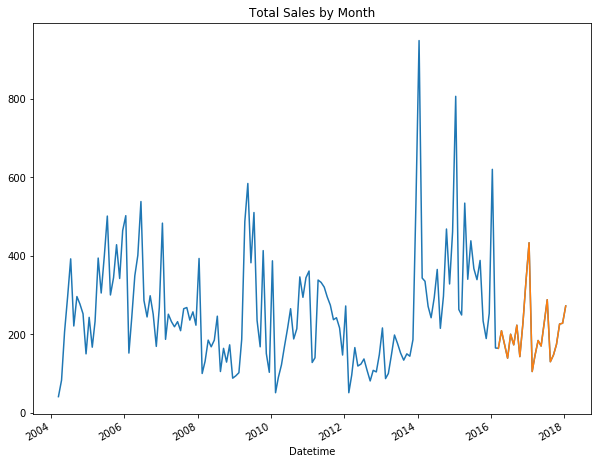

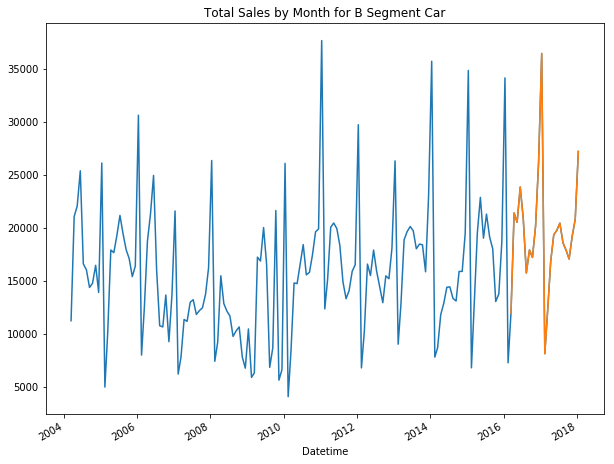

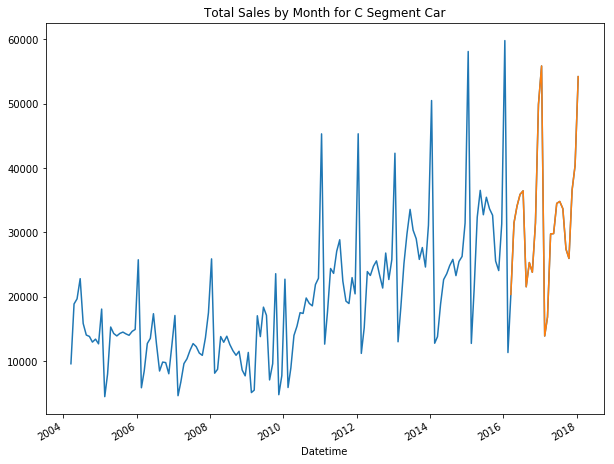

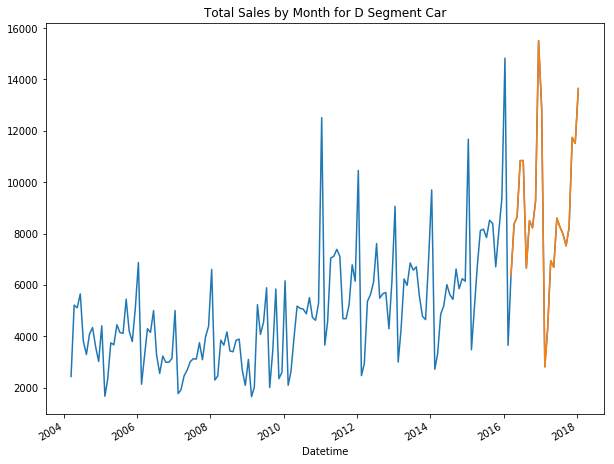

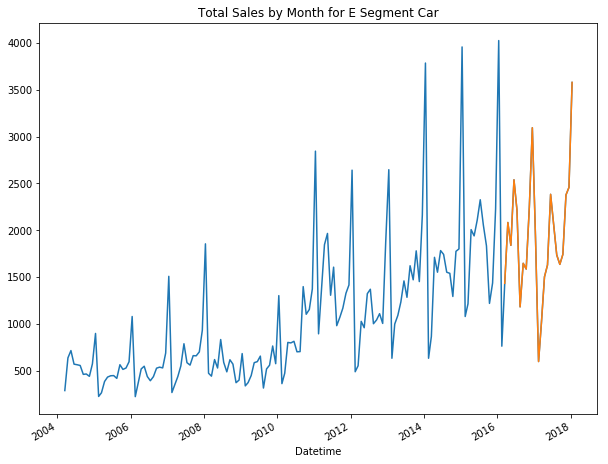

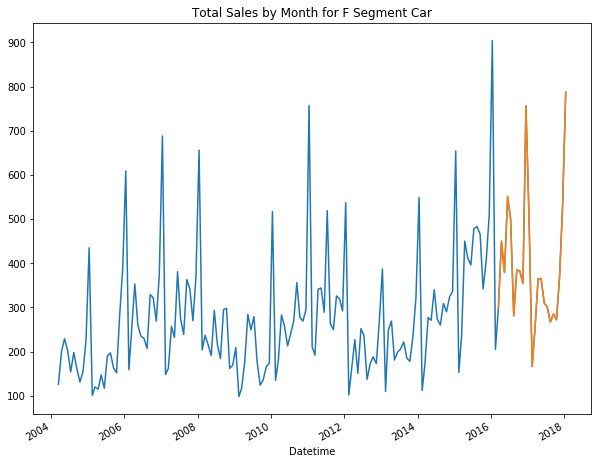

In [54]:
#Let’s visualize the data (train and test together) to know how it varies over a time period.

#For A segment
#Plotting data
X_train['Last_Month_A'].plot(figsize=(10,8), title= 'Total Sales by Month for A Segment Car', fontsize=10)
X_test['Last_Month_A'].plot(figsize=(10,8), title= 'Total Sales by Month', fontsize=10)
plt.show()
#For B segment
#Plotting data
X_train['Last_Month_B'].plot(figsize=(10,8), title= 'Total Sales by Month for B Segment Car', fontsize=10)
X_test['Last_Month_B'].plot(figsize=(10,8), title= 'Total Sales by Month for B Segment Car', fontsize=10)
plt.show()
#For C segment
X_train['Last_Month_C'].plot(figsize=(10,8), title= 'Total Sales by Month for C Segment Car', fontsize=10)
X_test['Last_Month_C'].plot(figsize=(10,8), title= 'Total Sales by Month for C Segment Car', fontsize=10)
plt.show()

#For D segment
X_train['Last_Month_D'].plot(figsize=(10,8), title= 'Total Sales by Month for D Segment Car', fontsize=10)
X_test['Last_Month_D'].plot(figsize=(10,8), title= 'Total Sales by Month for D Segment Car', fontsize=10)
plt.show()

#For E segment
X_train['Last_Month_E'].plot(figsize=(10,8), title= 'Total Sales by Month for E Segment Car', fontsize=10)
X_test['Last_Month_E'].plot(figsize=(10,8), title= 'Total Sales by Month for E Segment Car', fontsize=10)
plt.show()

#For F segment
X_train['Last_Month_F'].plot(figsize=(10,8), title= 'Total Sales by Month for F Segment Car', fontsize=10)
X_test['Last_Month_F'].plot(figsize=(10,8), title= 'Total Sales by Month for F Segment Car', fontsize=10)
plt.show()

#### 1.6 Time Series Decomposition

As observed,sales are higher at the beginning on every year and lower at the end.This is the major sign of seasonality.
Time-series decomposition make us to decompose our time-stamp data into three components: trend, seasonality, and noise.

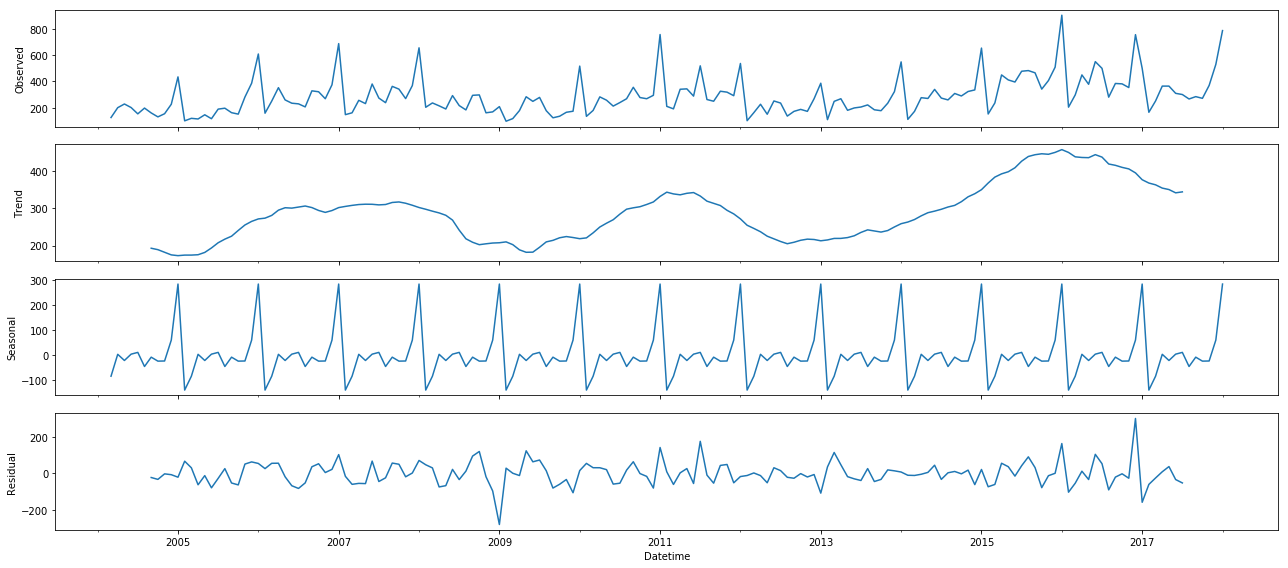

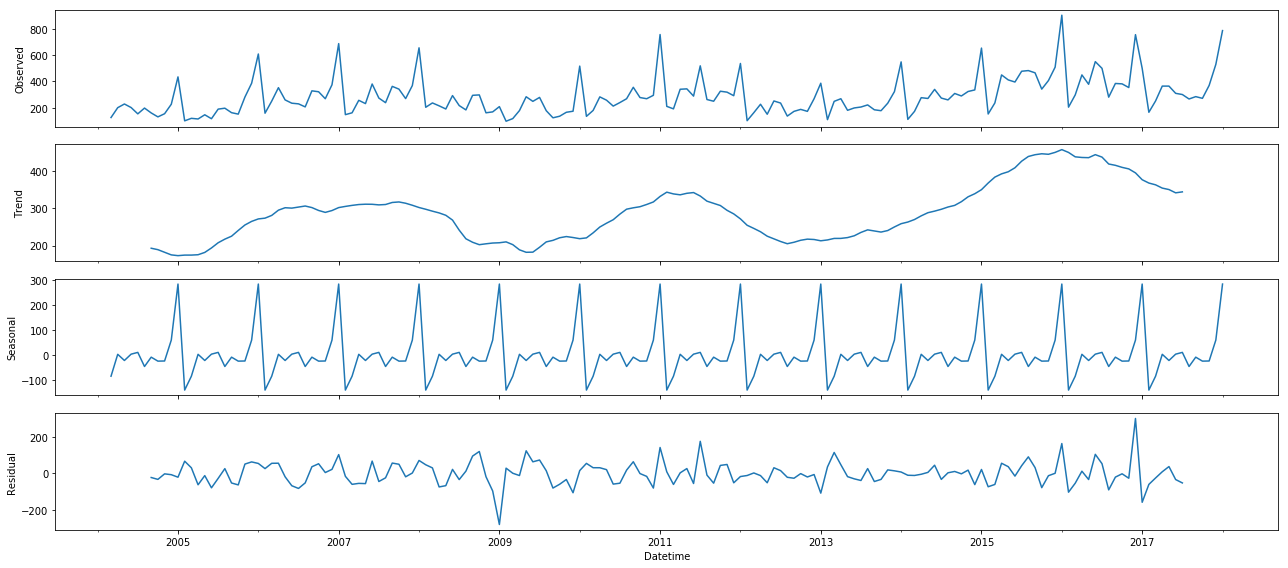

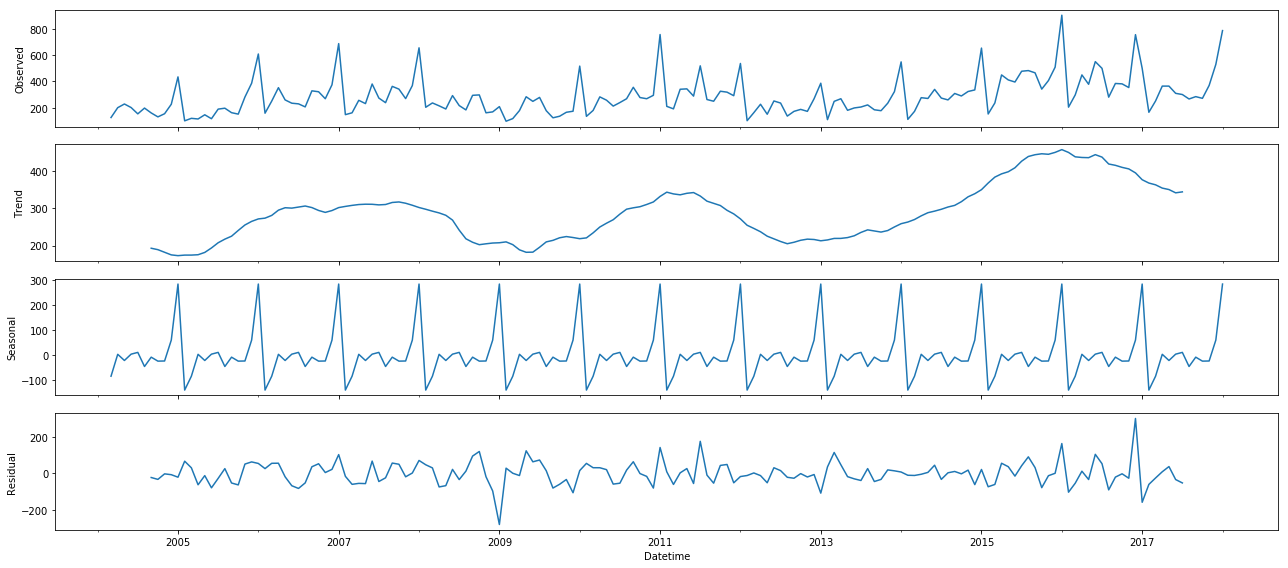

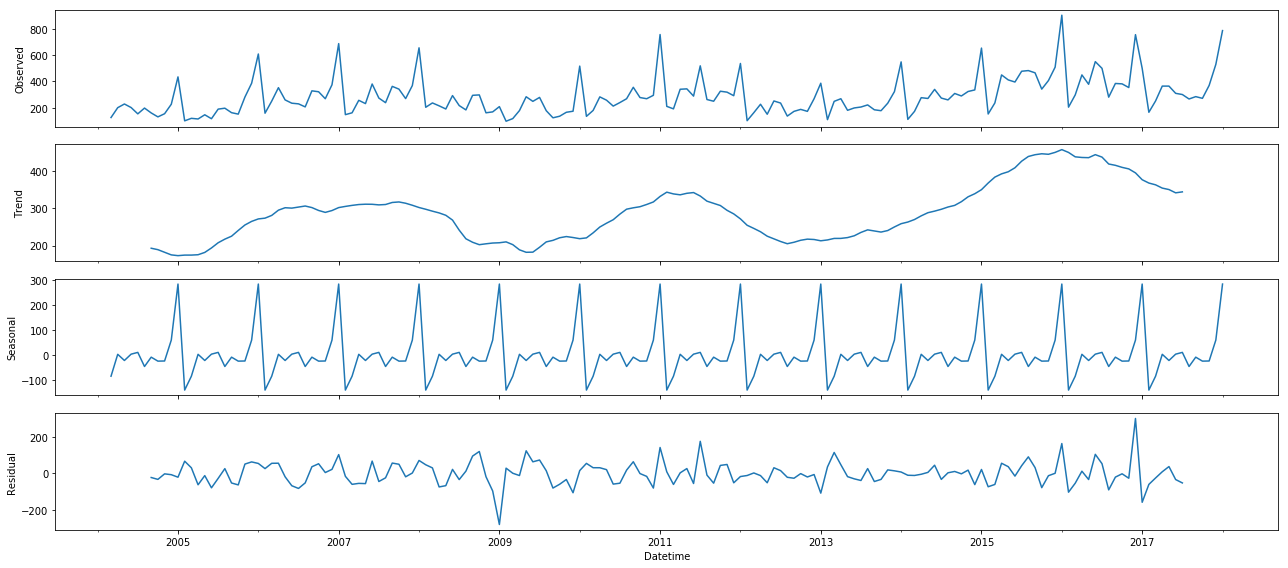

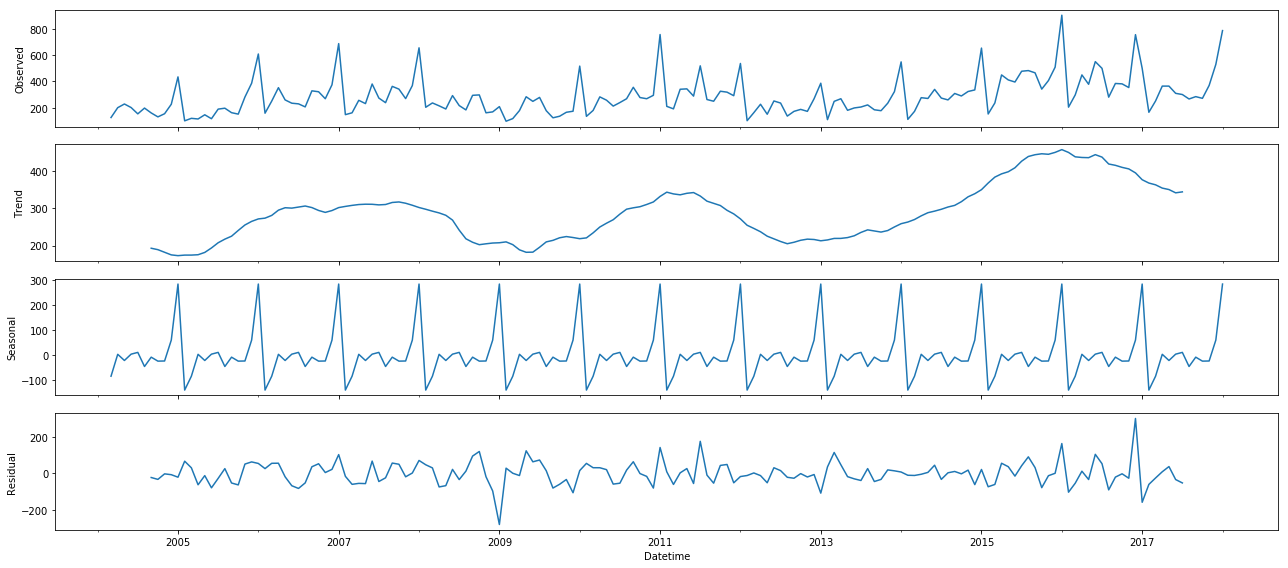

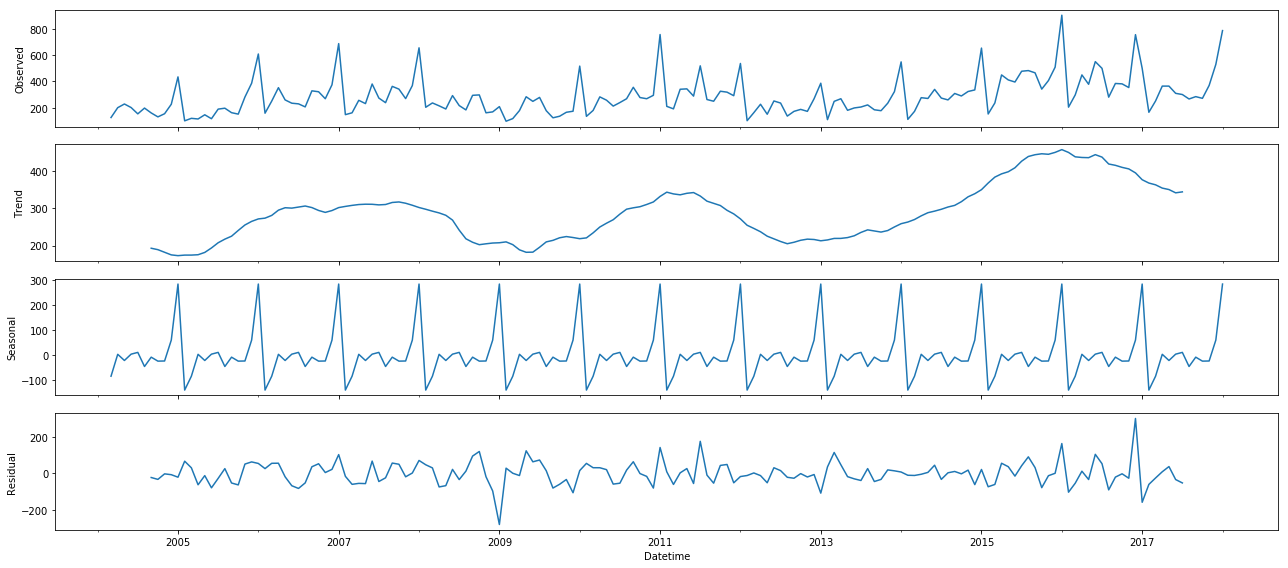

In [55]:
import statsmodels.api as sm

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

dec = sm.tsa.seasonal_decompose(X_A_train, model='additive')
fig = decomposition.plot()
plt.label="A Segment"
plt.show()

dec = sm.tsa.seasonal_decompose(X_B_train, model='additive')
fig = decomposition.plot()
plt.label="B Segment"
plt.show()

dec = sm.tsa.seasonal_decompose(X_C_train, model='additive')
fig = decomposition.plot()
plt.label="C Segment"
plt.show()

dec = sm.tsa.seasonal_decompose(X_D_train, model='additive')
plt.label="D Segment"
fig = decomposition.plot()
plt.show()

dec = sm.tsa.seasonal_decompose(X_E_train, model='additive')
fig = decomposition.plot()
plt.label="E Segment"
plt.show()

dec = sm.tsa.seasonal_decompose(X_F_train, model='additive')
fig = decomposition.plot()
plt.label="F Segment"
plt.show()

### 2.0 Time series forecasting with ARIMA

Arima models has take three parameter (p,d,q) which are corresponds to the seasonality,trend and noise.

#### 2.1 Finding optimal seasonality , trend and noise value  

In [56]:
import pmdarima as pm # Python package for auto arima.
from pmdarima.arima import ARIMA

#Finding the optimal model hyper-parameters using auto_arima:¶

fit = ARIMA(order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(y=X_A_train)
from pmdarima.arima import auto_arima

stepwise_fit = auto_arima(X_A_train, start_p=0, start_q=0, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()




Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1901.126, BIC=1910.237, Fit time=0.587 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1961.170, BIC=1967.244, Fit time=0.023 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1927.986, BIC=1940.134, Fit time=0.363 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1890.615, BIC=1902.763, Fit time=0.568 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1891.764, BIC=1906.948, Fit time=0.704 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1949.884, BIC=1958.995, Fit time=0.151 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1891.722, BIC=1906.907, Fit time=1.568 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1888.862, BIC=1907.083, Fit time=5.084 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1886.594, BIC=1907.853, Fit time=4.469 seconds
Fit ARIMA: order=(1, 1, 0) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  167
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -936.431
Date:                            Sun, 27 Jan 2019   AIC                           1882.862
Time:                                    23:58:49   BIC                           1898.047
Sample:                                         0   HQIC                          1889.030
                                            - 167                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1827      0.417     -0.438      0.661      -1.000       0.635
ar.L1          0.5392      0.095      5.670      0.000       0.353       0.726
ma.L1         -0.8803      0.075    -11.803      0.000      -1.026      -0.734
ma.S.L12      -0.8743      0.082    -10.665      0.000      -1.035      -0.714
sigma2      9975.6887   1042.214      9.572      0.000    7932.987     1.2e+04
===================================================================================
Ljung-Box (Q):                       34.00   Jarque-Bera (JB):               102.39
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             1.08
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We found  order=(1, 1, 1) seasonal_order=(0, 1, 1, 12) yields the lowest AIC value equals 1882.862. We weill use this as a optimal option.

#### 2.2 Fitting ARIMA Model for each segment & Validating & Results

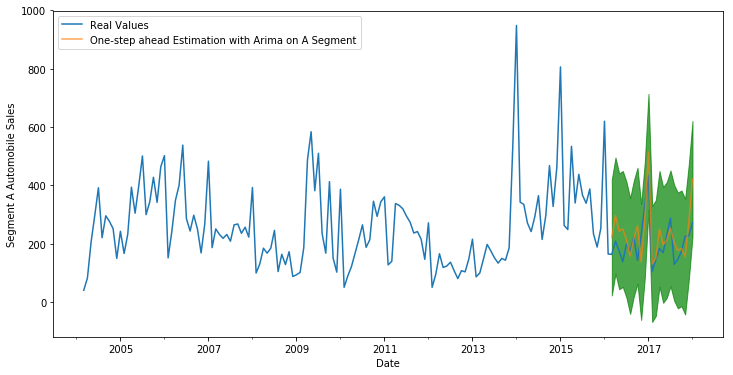

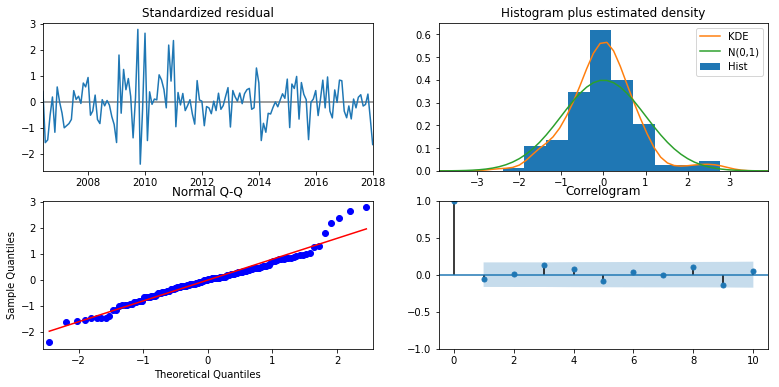

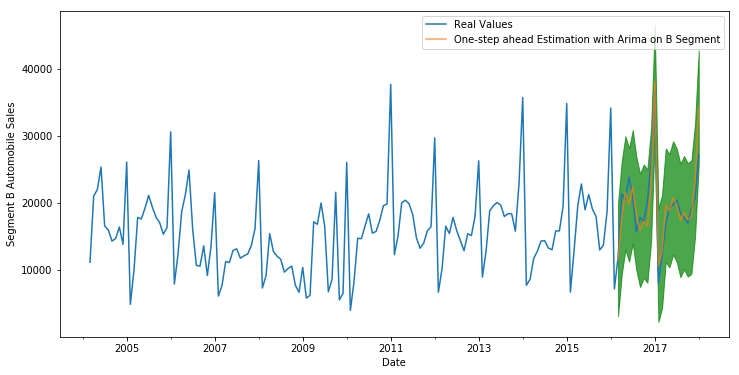

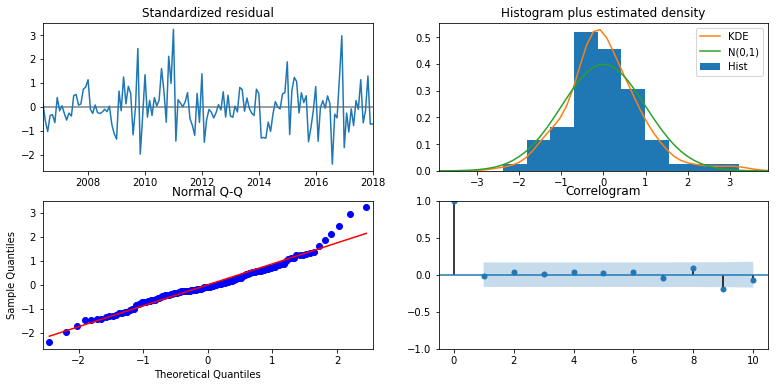

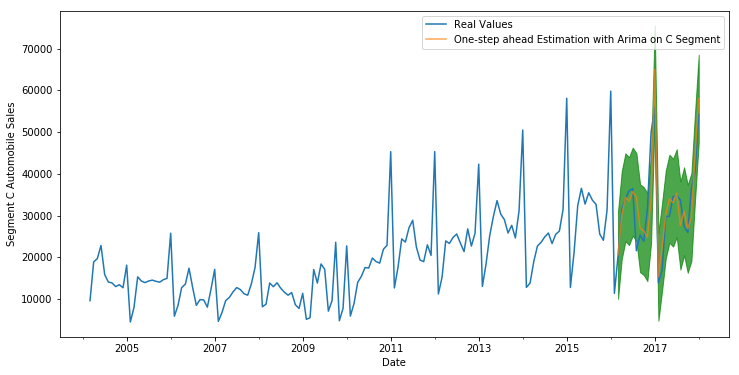

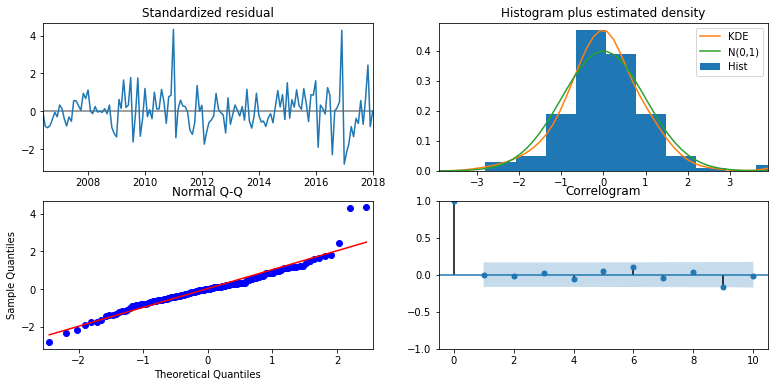

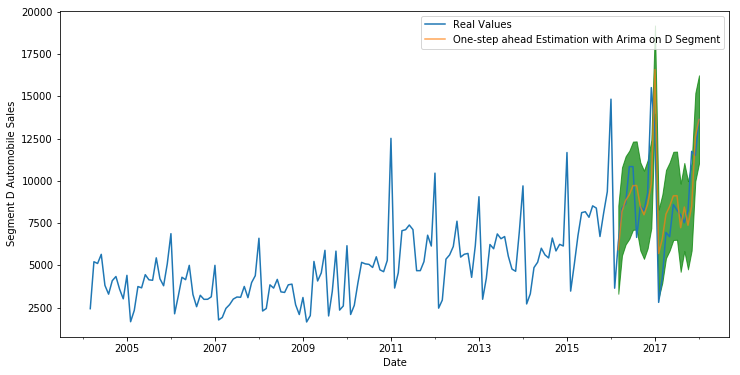

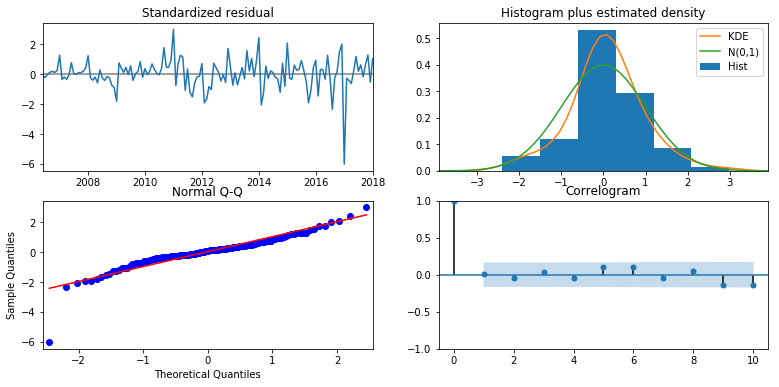

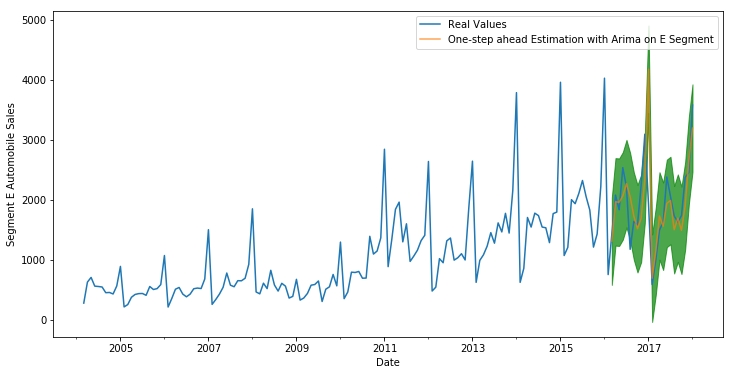

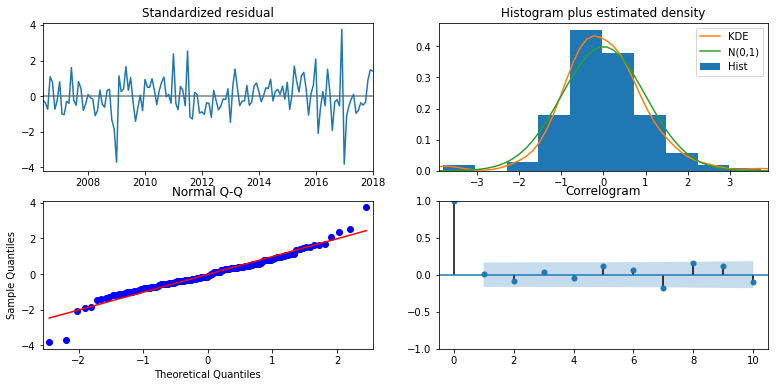

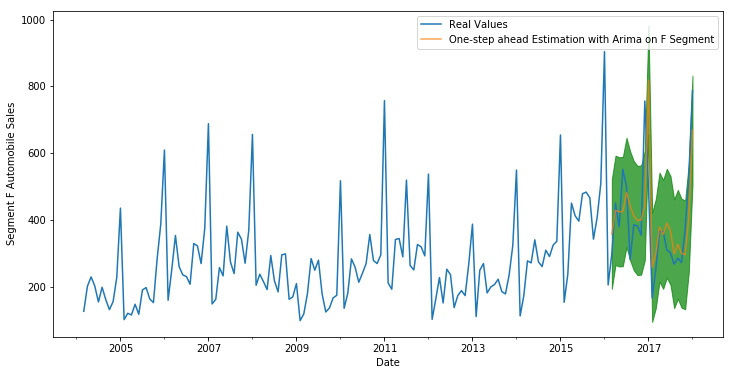

In [57]:
plt.show()

#Validating forecasts
#A segment
mod = sm.tsa.statespace.SARIMAX(X_A_train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Aresults = mod.fit()

predA = Aresults.get_prediction(start=pd.to_datetime('2016-03-01'), dynamic=False)
predA_ci = predA.conf_int()
fig = X_A_train['2004':].plot(label='Real Values')
predA.predicted_mean.plot(ax=fig, label='One-step ahead Estimation with Arima on A Segment', alpha=.7, figsize=(12, 6))
fig.fill_between(predA_ci.index,
                predA_ci.iloc[:, 0],
                predA_ci.iloc[:, 1], color='g', alpha=.7)
fig.set_xlabel('Date')
fig.set_ylabel('Segment A Automobile Sales')
plt.legend()
plt.show()

#B segment

mod = sm.tsa.statespace.SARIMAX(X_B_train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Bresults = mod.fit()
#print(results.summary().tables[1])
Bresults.plot_diagnostics(figsize=(13,6))
plt.show()

#Validating forecasts

predB = Bresults.get_prediction(start=pd.to_datetime('2016-03-01'), dynamic=False)
predB_ci = predB.conf_int()
fig = X_B_train['2004':].plot(label='Real Values')
predB.predicted_mean.plot(ax=fig, label='One-step ahead Estimation with Arima on B Segment', alpha=.7, figsize=(12, 6))
fig.fill_between(predB_ci.index,
                predB_ci.iloc[:, 0],
                predB_ci.iloc[:, 1], color='g', alpha=.7)
fig.set_xlabel('Date')
fig.set_ylabel('Segment B Automobile Sales')
plt.legend()
plt.show()

#C Segment

mod = sm.tsa.statespace.SARIMAX(X_C_train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Cresults = mod.fit()
#print(results.summary().tables[1])
Cresults.plot_diagnostics(figsize=(13,6))
plt.show()

#Validating forecasts

predC = Cresults.get_prediction(start=pd.to_datetime('2016-03-01'), dynamic=False)
predC_ci = predC.conf_int()
fig = X_C_train['2004':].plot(label='Real Values')
predC.predicted_mean.plot(ax=fig, label='One-step ahead Estimation with Arima on C Segment', alpha=.7, figsize=(12, 6))
fig.fill_between(predC_ci.index,
                predC_ci.iloc[:, 0],
                predC_ci.iloc[:, 1], color='g', alpha=.7)
fig.set_xlabel('Date')
fig.set_ylabel('Segment C Automobile Sales')
plt.legend()
plt.show()

#D segment

mod = sm.tsa.statespace.SARIMAX(X_D_train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Dresults = mod.fit()
#print(results.summary().tables[1])
Dresults.plot_diagnostics(figsize=(13,6))
plt.show()

#Validating forecasts

predD = Dresults.get_prediction(start=pd.to_datetime('2016-03-01'), dynamic=False)
predD_ci = predD.conf_int()
fig = X_D_train['2004':].plot(label='Real Values')
predD.predicted_mean.plot(ax=fig, label='One-step ahead Estimation with Arima on D Segment', alpha=.7, figsize=(12, 6))
fig.fill_between(predD_ci.index,
                predD_ci.iloc[:, 0],
                predD_ci.iloc[:, 1], color='g', alpha=.7)
fig.set_xlabel('Date')
fig.set_ylabel('Segment D Automobile Sales')
plt.legend()
plt.show()

# E Segment

mod = sm.tsa.statespace.SARIMAX(X_E_train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Eresults = mod.fit()
#print(results.summary().tables[1])
Eresults.plot_diagnostics(figsize=(13,6))
plt.show()

#Validating forecasts

predE = Eresults.get_prediction(start=pd.to_datetime('2016-03-01'), dynamic=False)
predE_ci = predE.conf_int()
fig = X_E_train['2004':].plot(label='Real Values')
predE.predicted_mean.plot(ax=fig, label='One-step ahead Estimation with Arima on E Segment', alpha=.7, figsize=(12, 6))
fig.fill_between(predE_ci.index,
                predE_ci.iloc[:, 0],
                predE_ci.iloc[:, 1], color='g', alpha=.7)
fig.set_xlabel('Date')
fig.set_ylabel('Segment E Automobile Sales')
plt.legend()
plt.show()

# F SEGMENT

mod = sm.tsa.statespace.SARIMAX(X_F_train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Fresults = mod.fit()
Fresults.plot_diagnostics(figsize=(13,6))
plt.show()

predF = Fresults.get_prediction(start=pd.to_datetime('2016-03-01'), dynamic=False)
predF_ci = predF.conf_int()
fig = X_F_train['2004':].plot(label='Real Values')
predF.predicted_mean.plot(ax=fig, label='One-step ahead Estimation with Arima on F Segment', alpha=.7, figsize=(12, 6))
fig.fill_between(predF_ci.index,
                predF_ci.iloc[:, 0],
                predF_ci.iloc[:, 1], color='g', alpha=.7)
fig.set_xlabel('Date')
fig.set_ylabel('Segment F Automobile Sales')
plt.legend()
plt.show()


Performance Metrics: Root Mean Squarred Error (RMSE) and Mean Absolute Percent Error (MAPE)

In [58]:
#Mean Square Error
from math import sqrt

A_est = predA.predicted_mean
rmse = sqrt(((A_est - X_A_test) ** 2).mean())
print('RMSE of A Segment is {}'.format(round(rmse, 2)))

B_est = predB.predicted_mean
rmse = sqrt(((B_est - X_B_test) ** 2).mean())
print('RMSE of B Segment is {}'.format(round(rmse, 2)))

C_est = predC.predicted_mean
rmse = sqrt(((C_est - X_C_test) ** 2).mean())
print('RMSE of C Segment is {}'.format(round(rmse, 2)))

D_est = predD.predicted_mean
rmse = sqrt(((D_est - X_D_test) ** 2).mean())
print('RMSE of D Segment is {}'.format(round(rmse, 2)))

E_est = predE.predicted_mean
rmse = sqrt(((E_est - X_E_test) ** 2).mean())
print('RMSE of E Segment is {}'.format(round(rmse, 2)))

F_est = predF.predicted_mean
rmse = sqrt(((F_est - X_F_test) ** 2).mean())
print('RMSE of F Segment is {}'.format(round(rmse, 2)))

#Mean Absolute percentage Error(Mape)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("A Segment ARIMA MAPE: ",mean_absolute_percentage_error(X_A_test,A_est))
print("B Segment ARIMA MAPE: ",mean_absolute_percentage_error(X_B_test,B_est))
print("C Segment ARIMA MAPE: ",mean_absolute_percentage_error(X_C_test,C_est))
print("D Segment ARIMA MAPE: ",mean_absolute_percentage_error(X_D_test,D_est))
print("E Segment ARIMA MAPE: ",mean_absolute_percentage_error(X_E_test,E_est))
print("F Segment ARIMA MAPE: ",mean_absolute_percentage_error(X_F_test,F_est))

RMSE of A Segment is 67.35
RMSE of B Segment is 2552.75
RMSE of C Segment is 5703.3
RMSE of D Segment is 2018.28
RMSE of E Segment is 578.32
RMSE of F Segment is 116.14
A Segment ARIMA MAPE:  28.758325599387145
B Segment ARIMA MAPE:  10.351520990636034
C Segment ARIMA MAPE:  12.875870126475917
D Segment ARIMA MAPE:  19.306468092020395
E Segment ARIMA MAPE:  18.77200313144981
F Segment ARIMA MAPE:  20.52684541485457


### 3.0 Triple Exponential Smoothing -  Holt's Winter Method

#### 3.1 Fitting & Forecasting & Plots

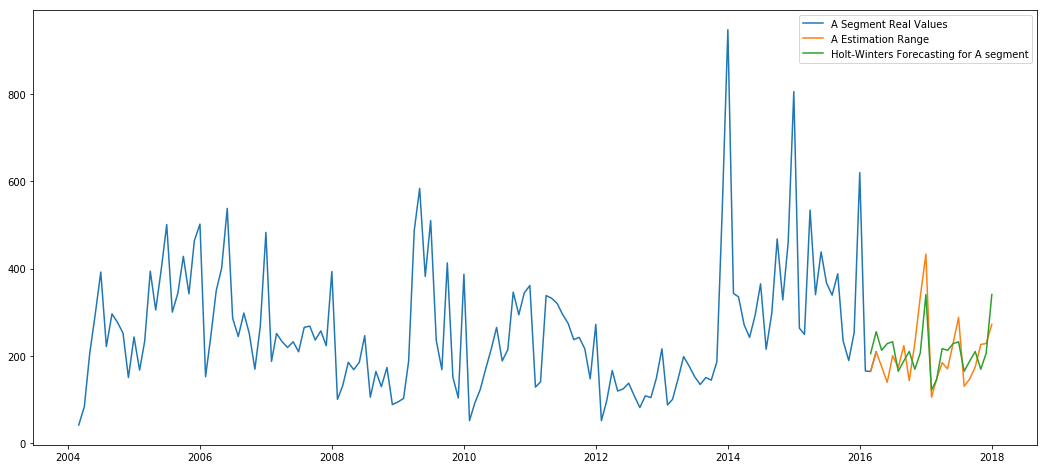

In [59]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#A Segment
model = ExponentialSmoothing(X_A_train[:146], seasonal='mul', seasonal_periods=12).fit()
Holt_pred_A = model.predict(start=X_A_test.index[0], end=X_A_test.index[-1])

plt.plot(X_A_train[:146].index, X_A_train[:146], label='A Segment Real Values')
plt.plot(X_A_test.index, X_A_test, label='A Estimation Range')
plt.plot(Holt_pred_A.index, Holt_pred_A, label='Holt-Winters Forecasting for A segment')
plt.legend(loc='best')




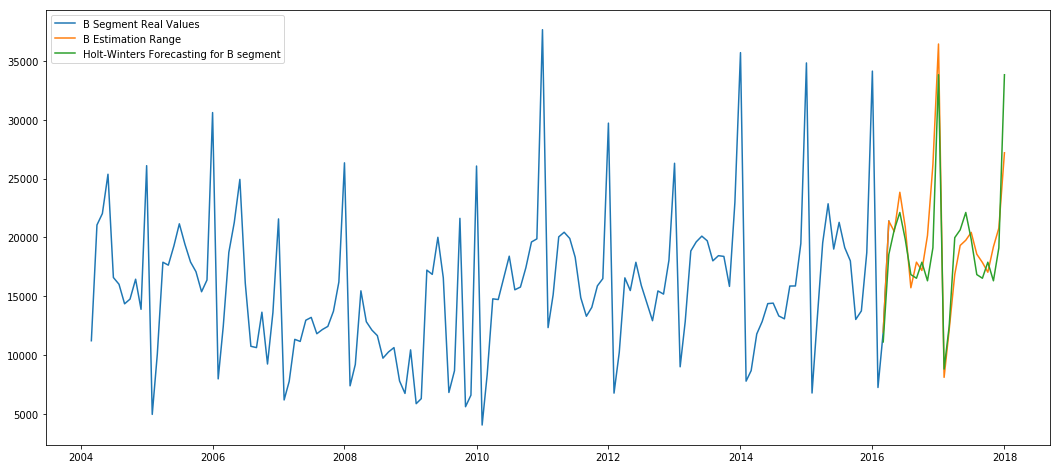

In [60]:
#B Segment

model = ExponentialSmoothing(X_B_train[:146], seasonal='mul', seasonal_periods=12).fit()
Holt_pred_B = model.predict(start=X_B_test.index[0], end=X_B_test.index[-1])

plt.plot(X_B_train[:146].index, X_B_train[:146], label='B Segment Real Values')
plt.plot(X_B_test.index, X_B_test, label='B Estimation Range')
plt.plot(Holt_pred_B.index, Holt_pred_B, label='Holt-Winters Forecasting for B segment')
plt.legend(loc='best')



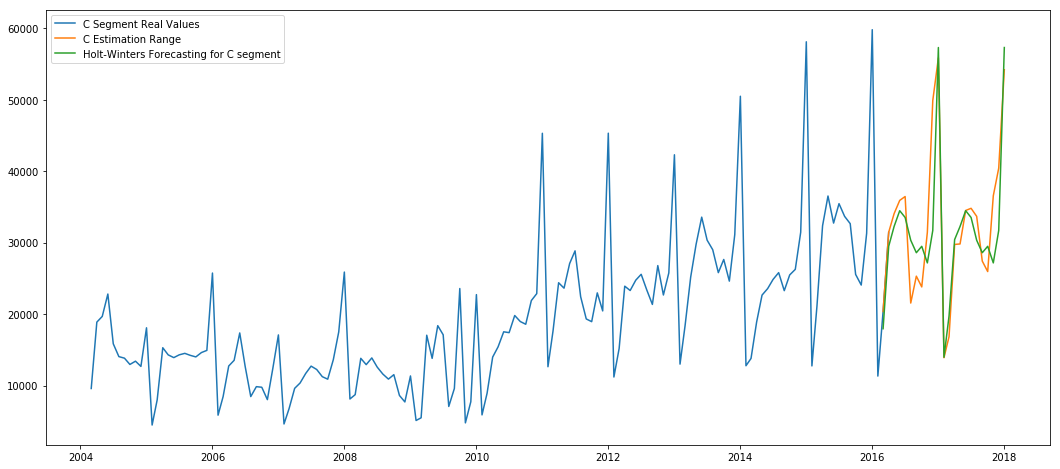

In [61]:
#C Segment

model = ExponentialSmoothing(X_C_train[:146], seasonal='mul', seasonal_periods=12).fit()
Holt_pred_C = model.predict(start=X_C_test.index[0], end=X_C_test.index[-1])

plt.plot(X_C_train[:146].index, X_C_train[:146], label='C Segment Real Values')
plt.plot(X_C_test.index, X_C_test, label='C Estimation Range')
plt.plot(Holt_pred_C.index, Holt_pred_C, label='Holt-Winters Forecasting for C segment')
plt.legend(loc='best')



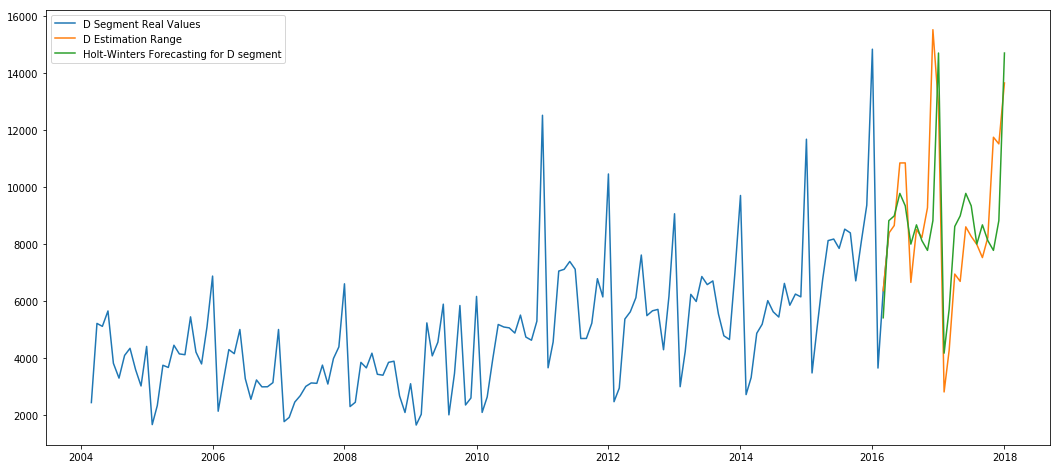

In [62]:
#D Segment

model = ExponentialSmoothing(X_D_train[:146], seasonal='mul', seasonal_periods=12).fit()
Holt_pred_D = model.predict(start=X_D_test.index[0], end=X_D_test.index[-1])

plt.plot(X_D_train[:146].index, X_D_train[:146], label='D Segment Real Values')
plt.plot(X_D_test.index, X_D_test, label='D Estimation Range')
plt.plot(Holt_pred_D.index, Holt_pred_D, label='Holt-Winters Forecasting for D segment')
plt.legend(loc='best')



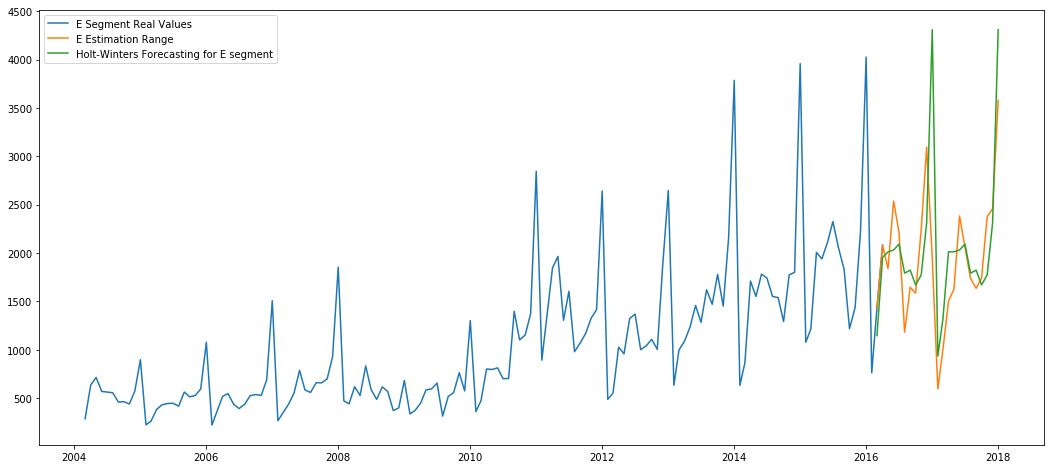

In [63]:
#E Segment

model = ExponentialSmoothing(X_E_train[:146], seasonal='mul', seasonal_periods=12).fit()
Holt_pred_E = model.predict(start=X_E_test.index[0], end=X_E_test.index[-1])

plt.plot(X_E_train[:146].index, X_E_train[:146], label='E Segment Real Values')
plt.plot(X_E_test.index, X_E_test, label='E Estimation Range')
plt.plot(Holt_pred_E.index, Holt_pred_E, label='Holt-Winters Forecasting for E segment')
plt.legend(loc='best')



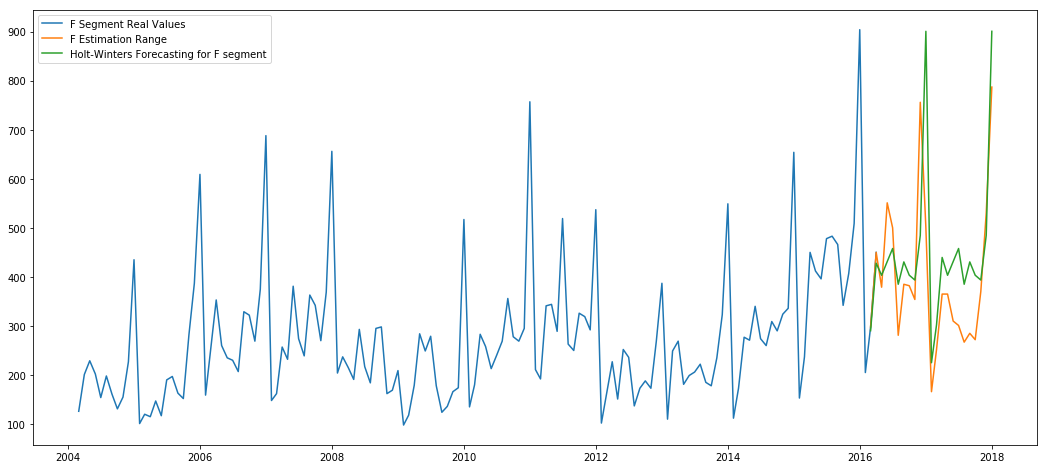

In [64]:
#F Segment

model = ExponentialSmoothing(X_F_train[:146], seasonal='mul', seasonal_periods=12).fit()
Holt_pred_F = model.predict(start=X_F_test.index[0], end=X_F_test.index[-1])

plt.plot(X_F_train[:146].index, X_F_train[:146], label='F Segment Real Values')
plt.plot(X_F_test.index, X_F_test, label='F Estimation Range')
plt.plot(Holt_pred_F.index, Holt_pred_F, label='Holt-Winters Forecasting for F segment')
plt.legend(loc='best')




#### 3.2 Performance Metrics

In [66]:
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(X_A_test, Holt_pred_A))
print('HW RMSE of A Segment is {}'.format(round(rmse, 2)))
rmse = sqrt(mean_squared_error(X_B_test, Holt_pred_B))
print('HW RMSE of B Segment is {}'.format(round(rmse, 2)))
rmse = sqrt(mean_squared_error(X_C_test, Holt_pred_C))
print('HW RMSE of C Segment is {}'.format(round(rmse, 2)))
rmse = sqrt(mean_squared_error(X_D_test, Holt_pred_D))
print('HW RMSE of D Segment is {}'.format(round(rmse, 2)))
rmse = sqrt(mean_squared_error(X_E_test, Holt_pred_E))
print('HW RMSE of E Segment is {}'.format(round(rmse, 2)))
rmse = sqrt(mean_squared_error(X_F_test, Holt_pred_F))
print('HW RMSE of F Segment is {}'.format(round(rmse, 2)))

print("A Segment Holt's Winter MAPE: ",mean_absolute_percentage_error(X_A_test,Holt_pred_A))
print("B Segment Holt's Winter MAPE: ",mean_absolute_percentage_error(X_B_test,Holt_pred_B))
print("C Segment Holt's Winter MAPE: ",mean_absolute_percentage_error(X_C_test,Holt_pred_C))
print("D Segment Holt's Winter MAPE: ",mean_absolute_percentage_error(X_D_test,Holt_pred_D))
print("E Segment Holt's Winter MAPE: ",mean_absolute_percentage_error(X_E_test,Holt_pred_E))
print("F Segment Holt's Winter MAPE: ",mean_absolute_percentage_error(X_F_test,Holt_pred_F))




HW RMSE of A Segment is 54.13
HW RMSE of B Segment is 2693.54
HW RMSE of C Segment is 5557.89
HW RMSE of D Segment is 2052.05
HW RMSE of E Segment is 623.81
HW RMSE of F Segment is 129.67
A Segment Holt's Winter MAPE:  22.410982095757248
B Segment Holt's Winter MAPE:  9.826318880930746
C Segment Holt's Winter MAPE:  12.104381869020155
D Segment Holt's Winter MAPE:  17.111817998622044
E Segment Holt's Winter MAPE:  23.00151672721008
F Segment Holt's Winter MAPE:  25.066337945486968


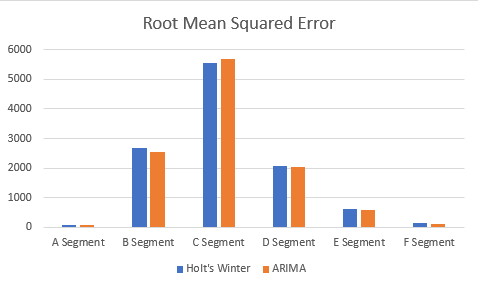

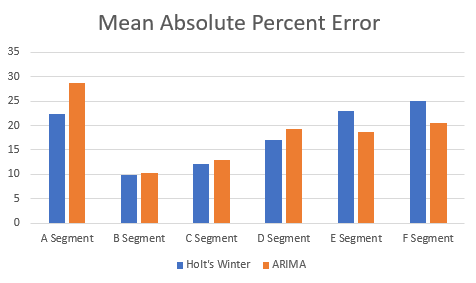